In [12]:
import pandas as pd
import numpy as np

In [13]:
actual = pd.read_csv("/content/drive/MyDrive/fyp/test-1457.csv")
resnet_df = pd.read_csv("/content/drive/MyDrive/resnet50-predict4.csv")
densenet_df = pd.read_csv("/content/drive/MyDrive/densenet121-predict.csv")

In [14]:
actual = actual.drop("Unnamed: 0",1)
actual.drop_duplicates(subset ="StudyInstanceUID",
                     keep = 'first', inplace = True)
target_cols = ['negative_exam_for_pe', 'rv_lv_ratio_gte_1', 'rv_lv_ratio_lt_1', 'leftsided_pe', 
        'chronic_pe', 'rightsided_pe', 'acute_and_chronic_pe', 'central_pe', 'indeterminate' ]
actual = actual[target_cols]
actual

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,negative_exam_for_pe,rv_lv_ratio_gte_1,rv_lv_ratio_lt_1,leftsided_pe,chronic_pe,rightsided_pe,acute_and_chronic_pe,central_pe,indeterminate
0,0,0,1,1,0,1,0,0,0
111,0,1,0,1,0,1,1,0,0
208,1,0,0,0,0,0,0,0,0
328,1,0,0,0,0,0,0,0,0
479,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
357281,0,1,0,1,1,0,0,0,0
357650,0,0,1,1,0,1,1,1,0
358098,1,0,0,0,0,0,0,0,0
358578,1,0,0,0,0,0,0,0,0


In [15]:
actual.columns = [0,1,2,3,4,5,6,7,8]
actual

,0,1,2,3,4,5,6,7,8
0,0,0,1,1,0,1,0,0,0
111,0,1,0,1,0,1,1,0,0
208,1,0,0,0,0,0,0,0,0
328,1,0,0,0,0,0,0,0,0
479,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
357281,0,1,0,1,1,0,0,0,0
357650,0,0,1,1,0,1,1,1,0
358098,1,0,0,0,0,0,0,0,0
358578,1,0,0,0,0,0,0,0,0


In [16]:
actual.to_csv('test-actual.csv', index=False)

In [17]:
weights = [0.0736196319, 0.09202453988, 0.1042944785, 0.1042944785, 0.1877300613, 0.06257668712, 0.06257668712, 0.2346625767, 0.0782208589]
weights = np.repeat(weights, 1457)
len(weights)

13113

In [18]:
ensemble = (densenet_df + resnet_df)/2

In [19]:
import pandas
pred = ensemble.to_numpy().flatten()
true = actual.to_numpy().flatten()

In [20]:
from sklearn.metrics import log_loss

log_loss(true, pred, sample_weight = weights)

0.3503872711717502

In [21]:
from sklearn.metrics import roc_auc_score

roc_auc_score(true, pred)

0.8748527495976726

In [22]:
pred = (pred > 0.5).astype(np.int_)
pred

array([0, 1, 0, ..., 0, 0, 0])

In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(true, pred)

array([[10037,   793],
       [  920,  1363]])

In [24]:
from sklearn.metrics import classification_report

print(classification_report(true, pred, digits=5))

              precision    recall  f1-score   support

           0    0.91604   0.92678   0.92138     10830
           1    0.63219   0.59702   0.61410      2283

    accuracy                        0.86937     13113
   macro avg    0.77411   0.76190   0.76774     13113
weighted avg    0.86662   0.86937   0.86788     13113



 Training loss and validation loss vs epoch line plots for DenseNet models:

<function matplotlib.pyplot.show(*args, **kw)>

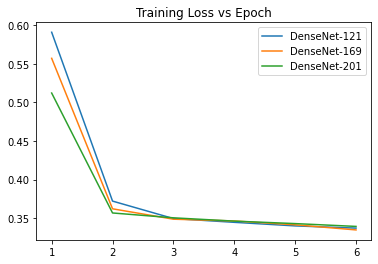

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x =  [1,2,3,4,5,6]
y1 = [0.59067, 0.37213, 0.34956, 0.34467, 0.34004, 0.33719]
y2 = [0.55691, 0.36216, 0.34872, 0.34641, 0.34145, 0.33484]
y3 = [0.51200, 0.35677, 0.35049, 0.34623, 0.34302, 0.33937]

plt.plot(x, y1, label='DenseNet-121')
plt.plot(x, y2, label='DenseNet-169')
plt.plot(x, y3, label='DenseNet-201')
plt.legend()
plt.title('Training Loss vs Epoch')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

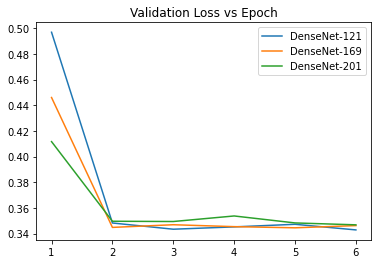

In [ ]:
y1=[0.49686, 0.34823,0.34338,0.34519,0.34721,0.34283]
y2=[0.44601,0.34479,0.34687,0.34538,0.34447,0.34620]
y3=[0.41163,0.34958,0.34938,0.35370,0.34827,0.34679]

plt.plot(x, y1, label='DenseNet-121')
plt.plot(x, y2, label='DenseNet-169')
plt.plot(x, y3, label='DenseNet-201')
plt.legend()
plt.title('Validation Loss vs Epoch')
plt.show

 Training loss and validation loss vs epoch line plots for ResNet models:

<function matplotlib.pyplot.show(*args, **kw)>

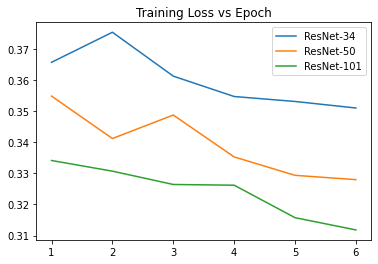

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x =  [1,2,3,4,5,6]
y1 = [0.36566, 0.37531, 0.36121, 0.35467, 0.35308, 0.35098]
y2 = [0.35481, 0.34118, 0.34872, 0.33527, 0.32936, 0.32797]
y3 = [0.33412, 0.33070, 0.32642, 0.32619, 0.31576, 0.31183]

plt.plot(x, y1, label='ResNet-34')
plt.plot(x, y2, label='ResNet-50')
plt.plot(x, y3, label='ResNet-101')
plt.legend()
plt.title('Training Loss vs Epoch')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

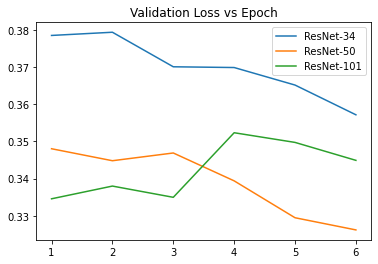

In [ ]:
y1=[0.37845,0.37931,0.37003,0.36983,0.36512,0.35713]
y2=[0.34801,0.34479,0.34687,0.33938,0.32947,0.32620]
y3=[0.33456,0.33798,0.33496,0.35231,0.34971,0.34489]

plt.plot(x, y1, label='ResNet-34')
plt.plot(x, y2, label='ResNet-50')
plt.plot(x, y3, label='ResNet-101')
plt.legend()
plt.title('Validation Loss vs Epoch')
plt.show

Train and validation loss for varying initial learning rate with densenet model:

<function matplotlib.pyplot.show(*args, **kw)>

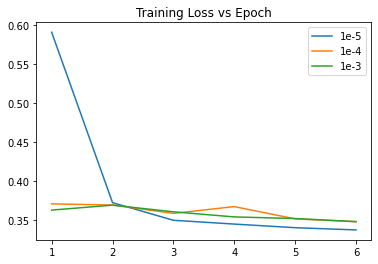

In [ ]:
x =  [1,2,3,4,5,6]
y1 = [0.59067, 0.37213, 0.34956, 0.34467, 0.34004, 0.33719]
y2 = [0.37059, 0.36908, 0.35838, 0.36711, 0.35133, 0.34767]
y3 = [0.36260, 0.36896, 0.36040, 0.35386, 0.35180, 0.34785]

plt.plot(x, y1, label='1e-5')
plt.plot(x, y2, label='1e-4')
plt.plot(x, y3, label='1e-3')
plt.legend()
plt.title('Training Loss vs Epoch')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

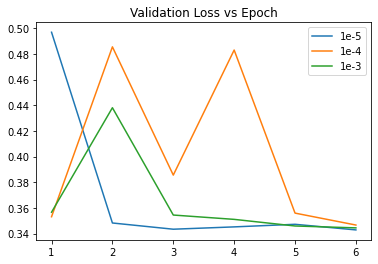

In [ ]:
x =  [1,2,3,4,5,6]
y1 = [0.49686, 0.34823, 0.34338, 0.34519, 0.34721, 0.34283]
y2 = [0.35310, 0.48547, 0.38555, 0.48299, 0.35593, 0.34663]
y3 = [0.35662, 0.43805, 0.35442, 0.35105, 0.34589, 0.34442]

plt.plot(x, y1, label='1e-5')
plt.plot(x, y2, label='1e-4')
plt.plot(x, y3, label='1e-3')
plt.legend()
plt.title('Validation Loss vs Epoch')
plt.show

Train and validation loss of both DenseNet and ResNet model for different optimizers:

<function matplotlib.pyplot.show(*args, **kw)>

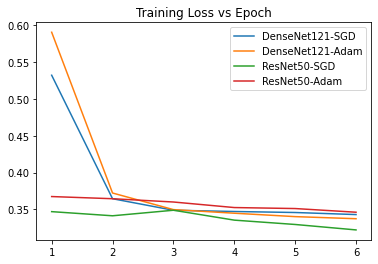

In [ ]:
x =  [1,2,3,4,5,6]
y2 = [0.59067, 0.37213, 0.34956, 0.34467, 0.34004, 0.33719]
y1 = [0.53224, 0.36437, 0.34870, 0.34700, 0.34564, 0.34283]

plt.plot(x, y1, label='DenseNet121-SGD')
plt.plot(x, y2, label='DenseNet121-Adam')
plt.legend()
plt.title('Training Loss vs Epoch')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

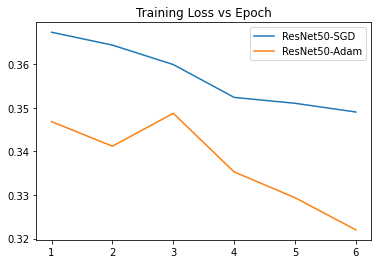

In [ ]:
x =  [1,2,3,4,5,6]
y3 = [0.34681,0.34118,0.34872,0.33527,0.32936,0.32197]
y4 = [0.36732, 0.36437, 0.35991, 0.35237, 0.35102, 0.34902]

plt.plot(x, y4, label='ResNet50-SGD')
plt.plot(x, y3, label='ResNet50-Adam')
plt.legend()
plt.title('Training Loss vs Epoch')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

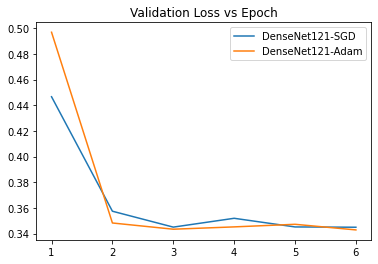

In [ ]:
x =  [1,2,3,4,5,6]
y1 = [0.44661, 0.35740, 0.34501, 0.35189, 0.34515, 0.34492]
y2 = [0.49686, 0.34823, 0.34338, 0.34519, 0.34721, 0.34283]

plt.plot(x, y1, label='DenseNet121-SGD')
plt.plot(x, y2, label='DenseNet121-Adam')
plt.legend()
plt.title('Validation Loss vs Epoch')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

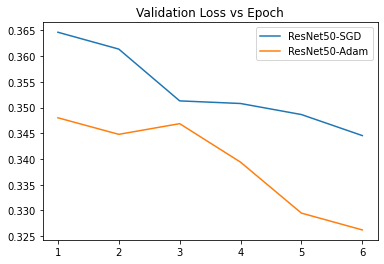

In [ ]:
x =  [1,2,3,4,5,6]
y3 = [0.34801,0.34479,0.34687,0.33938,0.32947,0.32620]
y4 = [0.36465, 0.36137, 0.35130, 0.35079, 0.34864, 0.34455]

plt.plot(x, y4, label='ResNet50-SGD')
plt.plot(x, y3, label='ResNet50-Adam')
plt.legend()
plt.title('Validation Loss vs Epoch')
plt.show

Optimimzed 3D CNN models on 20 training epochs:

<function matplotlib.pyplot.show(*args, **kw)>

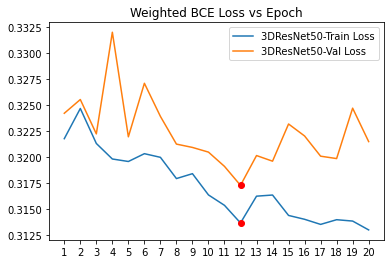

In [ ]:
x =  [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
y4 = [0.32175, 0.32465, 0.32129, 0.31980, 0.31956, 0.32031, 0.31996, 0.31792, 0.31839, 0.31635, 0.31535, 0.31366, 0.31623, 0.31634, 0.31438, 0.31401, 0.31352, 0.31397, 0.31384, 0.31299]
y3 = [0.32419, 0.32551, 0.32221, 0.33197, 0.32193, 0.32707, 0.32389, 0.32123, 0.32091, 0.32046, 0.31909, 0.31727, 0.32013, 0.31959, 0.32316, 0.32201, 0.32007, 0.31984, 0.32468, 0.32147]

plt.plot(x, y4, label='3DResNet50-Train Loss')
plt.plot(x, y3, label='3DResNet50-Val Loss')
plt.legend()
plt.title('Weighted BCE Loss vs Epoch')
plt.xticks(np.arange(0,21,1))
plt.plot(12, 0.31366, 'ro')
plt.plot(12, 0.31727, 'ro')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

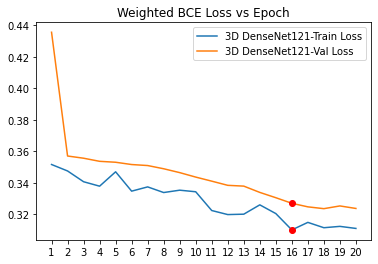

In [ ]:
x =  [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
y4 = [0.43552, 0.35702, 0.35562, 0.35365, 0.35306, 0.35161, 0.35097, 0.34893, 0.34648, 0.34365, 0.34107, 0.33842, 0.33792, 0.33393, 0.33057, 0.32703, 0.32477, 0.32362, 0.32535, 0.32375]
y3 = [0.35163, 0.34753, 0.34070, 0.33788, 0.34700, 0.33473, 0.33743, 0.33385, 0.33534, 0.33434, 0.32244, 0.31987, 0.32012, 0.32604, 0.32051, 0.31014, 0.31492, 0.31153, 0.31239, 0.31108]

plt.plot(x, y3, label='3D DenseNet121-Train Loss')
plt.plot(x, y4, label='3D DenseNet121-Val Loss')
plt.legend()
plt.title('Weighted BCE Loss vs Epoch')
plt.xticks(np.arange(0,21,1))
plt.plot(16, 0.32703, 'ro')
plt.plot(16, 0.31014, 'ro')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

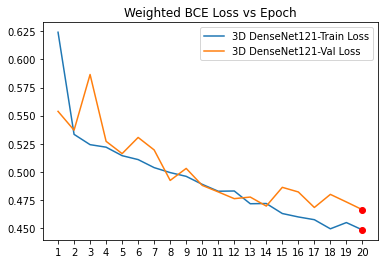

In [ ]:
x =  [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
y4 = [0.55381, 0.53705, 0.58659,  0.52716,  0.51621,  0.53061, 0.51949,  0.49238,  0.50306, 0.48797,  0.48216,  0.47617, 0.47758,  0.46957, 0.48623,  0.48212, 0.46832,  0.47996,  0.47322,  0.46632]
y3 = [0.62418,0.53335,0.52419,0.52195,0.51440, 0.51091, 0.50376, 0.49935, 0.49600, 0.48890, 0.48276, 0.48298,  0.47164,  0.47185, 0.46294,  0.45990,  0.45745,  0.44935,  0.45489, 0.44836]

plt.plot(x, y3, label='3D DenseNet121-Train Loss')
plt.plot(x, y4, label='3D DenseNet121-Val Loss')
plt.legend()
plt.title('Weighted BCE Loss vs Epoch')
plt.xticks(np.arange(0,21,1))
plt.plot(20, 0.46632, 'ro')
plt.plot(20, 0.44836, 'ro')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

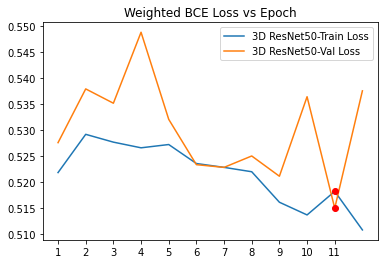

In [11]:
x =  [1,2,3,4,5,6,7,8,9,10,11,12]
y3 = [0.52183, 0.52918, 0.52768, 0.52659, 0.52722, 0.52357, 0.52283, 0.52199, 0.51613, 0.51369, 0.51822, 0.51081 ]
y4 = [0.52758, 0.53791, 0.53516, 0.54880, 0.53206,0.52335,  0.52283,0.52502, 0.52113,  0.53641, 0.51499,0.53754 ]

plt.plot(x, y3, label='3D ResNet50-Train Loss')
plt.plot(x, y4, label='3D ResNet50-Val Loss')
plt.legend()
plt.title('Weighted BCE Loss vs Epoch')
plt.xticks(np.arange(0,12,1))
plt.plot(11, 0.51822, 'ro')
plt.plot(11, 0.51499, 'ro')
plt.show